# Interior Point Methods
A test of the interior point method implementations

In [1]:
from numpy.linalg import solve
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import sys
sys.path.append('./')
from InteriorPoint import *
from solvers import *

In [2]:
x0_ls = np.random.randn(5)
A_ls = np.random.randn(25,5)
b_ls = np.random.randn(25)
C_ls = np.random.randn(15,5) 
d_ls = np.ones(15) + abs(C_ls@x0_ls) #to ensure that it is feasible and we start in the interiorp
x_ls = np.zeros(5)
x_cgd = np.zeros(5)

def func_ls(x):
    return (norm(A_ls@x - b_ls)**2)/2
def grad_ls(x):
    return A_ls.T@(A_ls@x - b_ls)
step_size = 1.0/max(abs(np.linalg.eigvals(A_ls.T@A_ls)))

x_ls,obj_his,pt_his,exit_flag=lsInteriorPoint(x0_ls,A_ls,b_ls,C_ls,d_ls)
x_cgd,obj_his2,err_his,exit_flag2=constrainedGD(x0_ls,func_ls,grad_ls,C_ls,d_ls,step_size)



Text(0.5, 1.0, 'Comparison of Constrained GD and IPM')

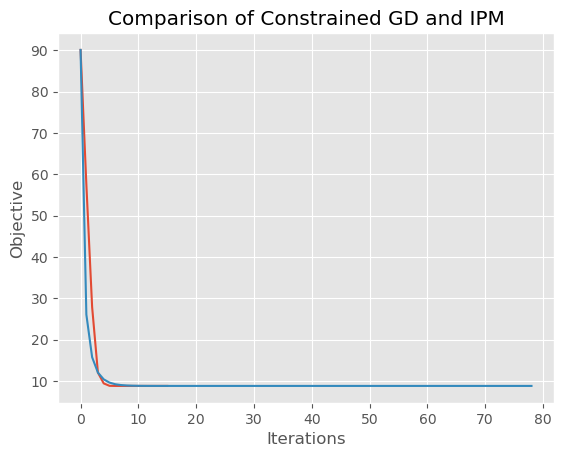

In [3]:
plt.plot(obj_his)
plt.plot(obj_his2)
plt.xlabel('Iterations')
plt.ylabel('Objective')
#plt.title('Convergence rate of IPM for Least Squares')
plt.title('Comparison of Constrained GD and IPM')

Text(0.5, 1.0, 'IPM for Logistic Regression w/ 1-norm Regularizer')

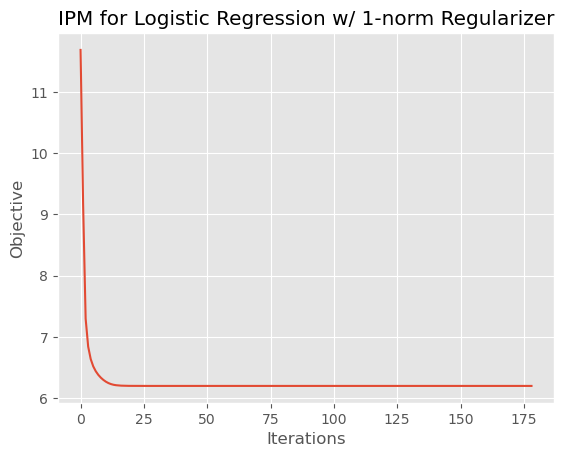

In [19]:
A_log = np.random.randn(5,2)
b_log = np.random.randn(5)
c_log = 5*np.random.randn(2)
def func_log(z):
    return sum(np.log(1+np.exp(A_log@z[:2]))) + np.inner(b_log,A_log@z[:2]) + z[-1]
def grad_log(z):
    xpart = A_log.T@b_log
    for i in range(A_log.shape[0]):
        w = np.exp(np.inner(A_log[i],z[:2]))
        xpart += (w/(w+1))*A_log[i]
    ypart = 1
    return np.block([xpart,ypart])
def hess_log(z):
    H = np.zeros((2,2))
    for i in range(A_log.shape[0]):
        w = np.exp(np.inner(A_log[i],z[:2]))
        H += (w/((w+1)**2))*(np.outer(A_log[i],A_log[i]))
    return np.block([[H,np.zeros((2,1))],[np.zeros((1,2)),0]])

x0_log = np.random.randn(2)
y0_log = sum(abs(x0_log - c_log)) + 1 #making sure we start at an interior point
z0_log = np.block([x0_log,y0_log])
C_log = np.random.randn(5,2)
C_g = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
C_hat = np.block([[C_log,np.zeros((5,1))],[C_g,-np.ones((4,1))]])
d_log = C_log@x0_log + np.ones(5) #ensuring feasibility
d_g = np.block([c_log[0] + c_log[1], c_log[0]-c_log[1],-c_log[0]+c_log[1],-c_log[0]-c_log[1]])
d_hat = np.block([d_log,d_g])
z_log = np.zeros(3)
z_log,obj_his,err_his,pt_his,exit_flag=interiorPoint(z0_log,func_log,grad_log,hess_log,C_hat,d_hat)

plt.plot(obj_his)
plt.xlabel('Iterations')
plt.ylabel('Objective')
plt.title('IPM for Logistic Regression w/ 1-norm Regularizer')

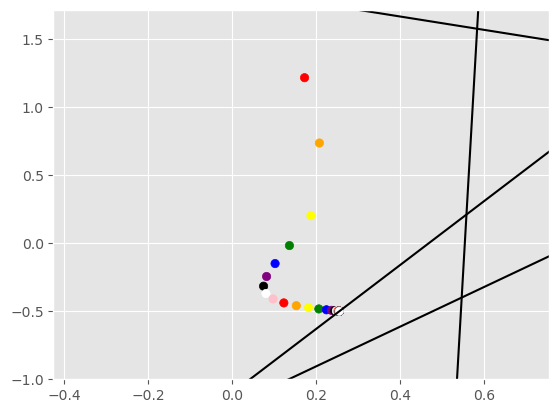

In [20]:
colors = np.array(['red','orange','yellow','green','blue','purple','black','white','pink'])
colors = np.tile(colors,int(len(obj_his)/9)+1)
colors = colors[:len(obj_his + 1)]
plt.scatter((np.array(pt_his).T)[0], (np.array(pt_his).T)[1],c=colors)

x = np.array([min(min((np.array(pt_his).T)[0]))-.5,max(max((np.array(pt_his).T)[0]))+.5])
for i in [0,1,2,3,4]:
    y = (d_log[i]- C_log[i,0]*x)/C_log[i,1]
    plt.plot(x,y,'-',c='black')
plt.ylim(min(min((np.array(pt_his).T)[1]))-.5,max(max((np.array(pt_his).T)[1]))+.5)
plt.xlim(min(min((np.array(pt_his).T)[0]))-.5,max(max((np.array(pt_his).T)[0]))+.5)
plt.show()